In [2]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt 

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)


HISTOGRAMS

In [2]:
df_DA_US = df[(df['job_title_short']=='Data Analyst') & (df['job_country']=='United States')].copy()

Text(0.5, 1.0, 'Distribution of US Data Analyst Yearly Salary')

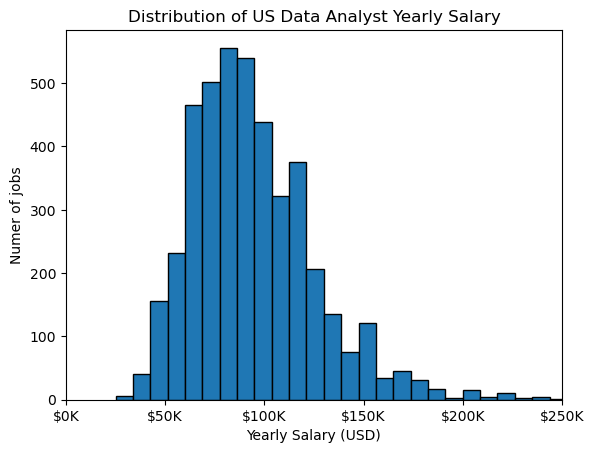

In [9]:
df_DA_US['salary_year_avg'].plot(kind='hist', bins=40, edgecolor='black')
ax =plt.gca()  
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))
plt.xlim(0,250000)
plt.ylabel('Numer of jobs')
plt.xlabel('Yearly Salary (USD)')
plt.title('Distribution of US Data Analyst Yearly Salary')

BOX PLOTS

In [4]:
df_DA_US = df[(df['job_title_short']=='Data Analyst') & (df['job_country']=='United States')].copy()
df_DA_US = df_DA_US.dropna(subset=['salary_year_avg'])

<Axes: >

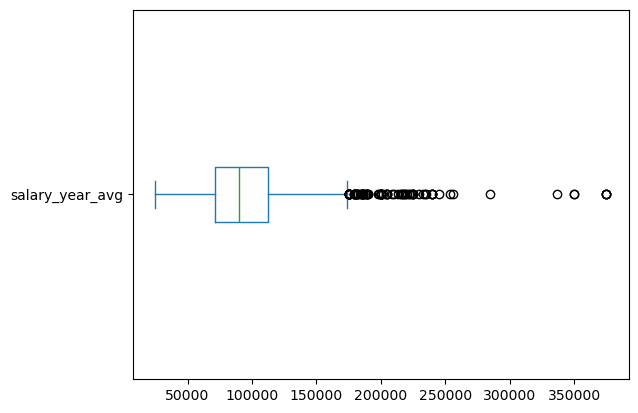

In [8]:
df_DA_US['salary_year_avg'].sample(10)
df_DA_US['salary_year_avg'].plot(kind='box', vert=False)
# plt.boxplot(df_DA_US['salary_year_avg'])

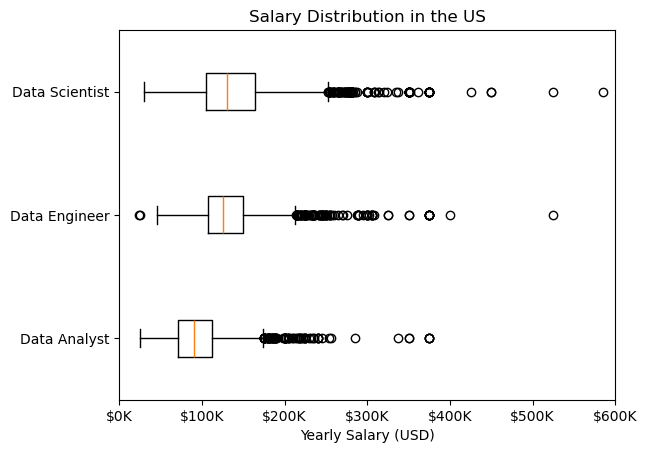

In [ ]:
job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']

df_US = df[(df['job_title_short'].isin(job_titles)) & (df['job_country']=='United States')].copy()
df_US = df_US.dropna(subset=['salary_year_avg'])

job_list = [df_US[df_US['job_title_short']==job_title]['salary_year_avg'] for job_title in job_titles]

plt.boxplot(job_list, tick_labels= job_titles, vert=False)
plt.xlim(0,600000)
plt.xlabel('Yearly Salary (USD)')
plt.title('Salary Distribution in the US')
ax =plt.gca()  
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))

Skill pay Analysis Exercise

In [20]:
df_US_DA = df[(df['job_title_short']=='Data Analyst') & (df['job_country']=='United States')].copy()
df_US_DA = df_US_DA.dropna(subset=['salary_year_avg'])

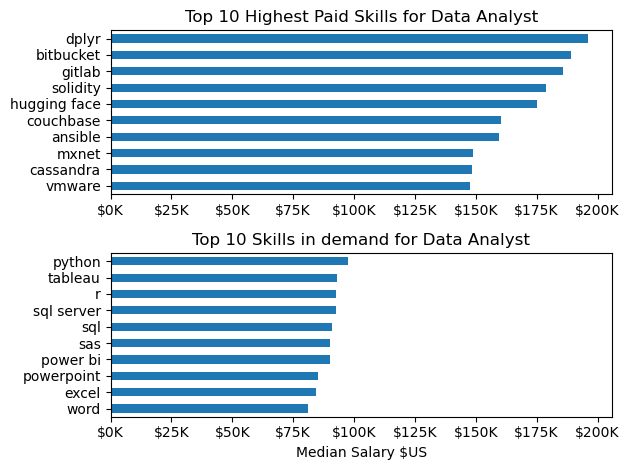

In [39]:
df_US_DA = df_US_DA.explode('job_skills')

df_US_DA_group = df_US_DA.groupby('job_skills')['salary_year_avg'].agg(['count', 'median'])
df_US_DA_top_pay = df_US_DA_group.sort_values(by='median', ascending=False).head(10)
df_US_DA_skills = df_US_DA_group.sort_values(by='count', ascending=False).head(10).sort_values(by='median', ascending=False)

fig, ax = plt.subplots(2, 1)
 
df_US_DA_top_pay[::-1].plot(kind='barh', y='median', ax=ax[0], legend=False)
#con el [::-1] en esa posicion en la lina podemos invertir los ejes tambien, asi como con ax[0].invert_yaxis()
ax[0].set_title('Top 10 Highest Paid Skills for Data Analyst')
ax[0].set_xlabel('')
ax[0].set_ylabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))

df_US_DA_skills[::-1].plot(kind='barh', y='median', ax=ax[1], legend=False)
ax[1].set_xlim(ax[0].get_xlim()) #El limite de la segunda grafica se ajusta al limite que tiene la primera
ax[1].set_title('Top 10 Skills in demand for Data Analyst')
ax[1].set_xlabel('Median Salary $US')
ax[1].set_ylabel('')
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))

fig.tight_layout()